In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import datetime
import math
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
1,2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
2,2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
3,2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300
4,2018-09-17,222.149994,222.949997,217.270004,217.880005,214.550659,37195100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null object
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,252.0,1.922576e+02,2.105643e+01,1.439800e+02,1.748725e+02,1.964350e+02,2.077175e+02,2.307800e+02
High,252.0,1.943259e+02,2.122623e+01,1.457200e+02,1.759675e+02,1.990550e+02,2.092600e+02,2.334700e+02
Low,252.0,1.902577e+02,2.094744e+01,1.420000e+02,1.737475e+02,1.939300e+02,2.055950e+02,2.297800e+02
Close,252.0,1.923228e+02,2.105651e+01,1.421900e+02,1.748325e+02,1.970000e+02,2.079125e+02,2.320700e+02
Adj Close,252.0,1.907396e+02,2.089716e+01,1.405058e+02,1.734530e+02,1.958779e+02,2.065605e+02,2.285238e+02
Volume,252.0,3.256731e+07,1.390068e+07,1.136200e+07,2.291840e+07,2.942395e+07,3.883658e+07,9.624670e+07


<h1>Rolling Mean (Moving Average) — to determine trend</h1>

In [6]:
df.set_index('Date', inplace=True)
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [7]:
df['mavg'] = mavg

In [8]:
df.tail(10) #last 10 moving average

,Open,High,Low,Close,Adj Close,Volume,mavg
Date,,,,,,,
2019-08-28,204.100006,205.720001,203.320007,205.529999,205.529999,15938800,198.286788
2019-08-29,208.500000,209.320007,206.660004,209.009995,209.009995,20990500,198.391109
2019-08-30,210.160004,210.449997,207.199997,208.740005,208.740005,21143400,198.498685
2019-09-03,206.429993,206.979996,204.220001,205.699997,205.699997,20023000,198.564745
2019-09-04,208.389999,209.479996,207.320007,209.190002,209.190002,19188100,198.682279
2019-09-05,212.000000,213.970001,211.509995,213.279999,213.279999,23913700,198.841507
2019-09-06,214.050003,214.419998,212.509995,213.259995,213.259995,19362300,198.996962
2019-09-09,214.839996,216.440002,211.070007,214.169998,214.169998,27309400,199.161318
2019-09-10,213.860001,216.779999,211.710007,216.699997,216.699997,31693800,199.312470


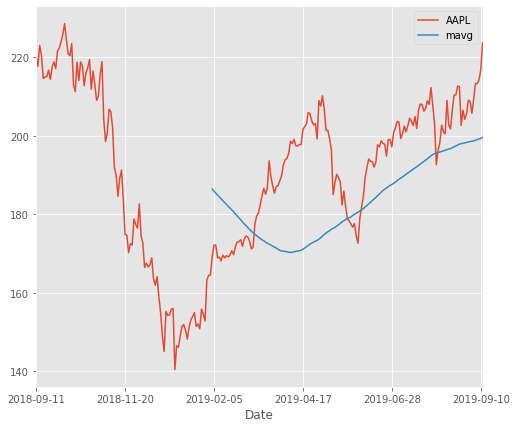

In [9]:
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

<font color='blue'>we could see, The Moving Average steadily rises over the window and does not follow the jagged line of stocks price chart.</font>

<h1>Return Deviation — to determine risk and return</h1>

Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
Following is the formula you could refer to:

Formula for Returns

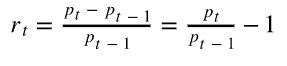

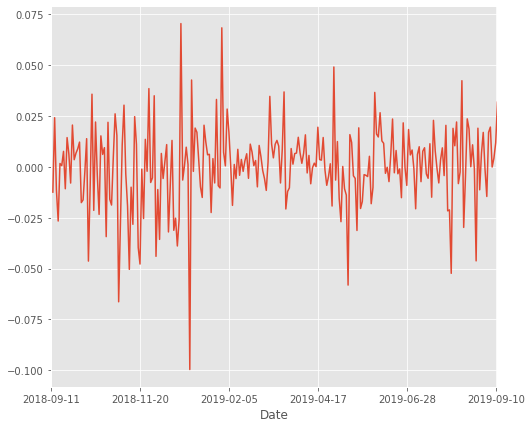

In [10]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

<h1>Feature Engineering</h1>
<br>We will use these three machine learning models to predict our stocks: 
    <br>Simple Linear Analysis, 
    <br>Quadratic Discriminant Analysis (QDA), and 
    <br>K Nearest Neighbor (KNN). 
    <br><br>But first, let us engineer some features: High Low Percentage and Percentage Change.

In [11]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

<h1>Pre-processing & Cross Validation</h1>
<br>We will clean up and process the data using the following steps before putting them into the prediction models:
<ol>Drop missing value</ol>
<ol>Separating the label here, we want to predict the AdjClose</ol>
<ol>Scale the X so that everyone can have the same distribution for linear regression</ol>
<ol>Finally We want to find Data Series of late X and early X (train) for model generation and evaluation</ol>
<ol>Separate label and identify it as y</ol>
<ol>Separation of training and testing of model by cross validation train test split</ol>

In [12]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

<h1> Train Test Set</h1>

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h1>Model Generation</h1>

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

In [16]:
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

<h2>Regression</h2>

In [17]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [18]:
y_pred_reg = clfreg.predict(X_test)
y_pred_poly2 = clfpoly2.predict(X_test)
y_pred_poly3 = clfpoly3.predict(X_test)

In [19]:
get_performance(y_pred_reg)

Mean Absolute Error: 4.8473
Mean Squared Error: 36.6114
Root Mean Squared Error: 6.0507


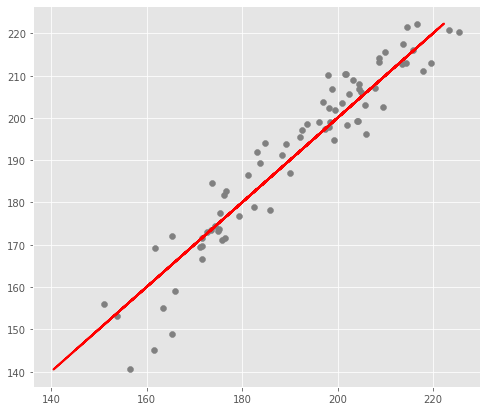

In [20]:
get_plot(y_pred_reg)

In [21]:
get_performance(y_pred_poly2)

Mean Absolute Error: 5.075
Mean Squared Error: 42.9126
Root Mean Squared Error: 6.5508


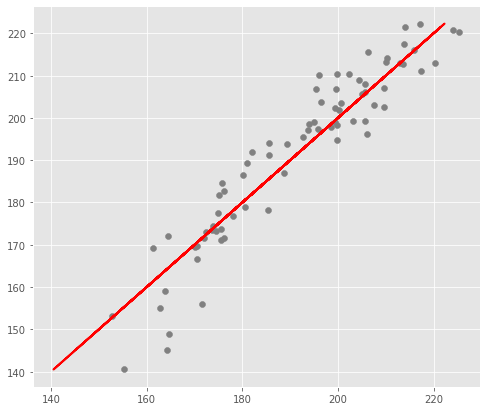

In [22]:
get_plot(y_pred_poly2)

In [23]:
get_performance(y_pred_poly3)

Mean Absolute Error: 5.2082
Mean Squared Error: 43.7146
Root Mean Squared Error: 6.6117


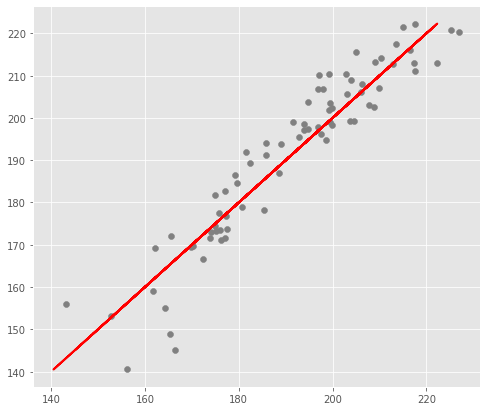

In [24]:
get_plot(y_pred_poly3)

<h2> Ridge Regression</h2>

In [25]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(X_test)

In [26]:
get_performance(y_pred_ridge)

Mean Absolute Error: 4.8609
Mean Squared Error: 36.8378
Root Mean Squared Error: 6.0694


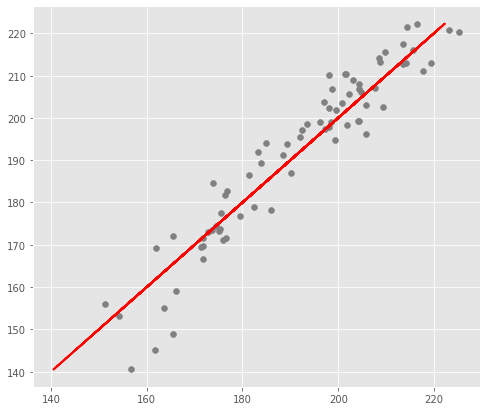

In [27]:
get_plot(y_pred_ridge)

<h2>Gradient Boosted tree</h2>

In [28]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Infer
y_pred_gb = model_gb.predict(X_test)

In [29]:
get_performance(y_pred_gb)

Mean Absolute Error: 4.6383
Mean Squared Error: 36.2153
Root Mean Squared Error: 6.0179


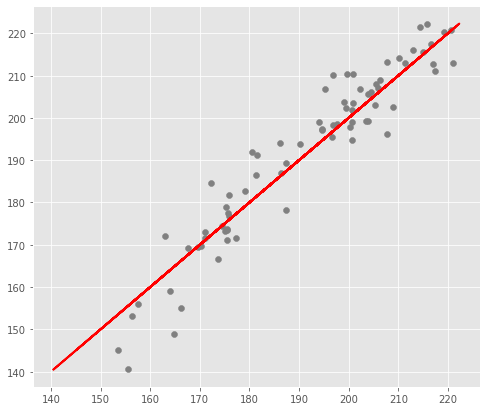

In [30]:
get_plot(y_pred_gb)

<h2>Lasso</h2>

In [31]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

#generate predictions
y_pred_lasso=model_lasso.predict(X_test)

In [32]:
get_performance(y_pred_lasso)

Mean Absolute Error: 4.8544
Mean Squared Error: 37.8639
Root Mean Squared Error: 6.1534


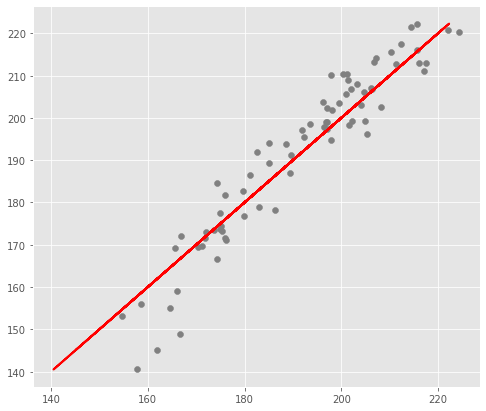

In [33]:
get_plot(y_pred_lasso)

<h2>K Nearest Neighbor (KNN)</h2>

In [34]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

y_pred_knn= clfknn.predict(X_test)

In [35]:
get_performance(y_pred_knn)

Mean Absolute Error: 6.8979
Mean Squared Error: 84.5433
Root Mean Squared Error: 9.1947


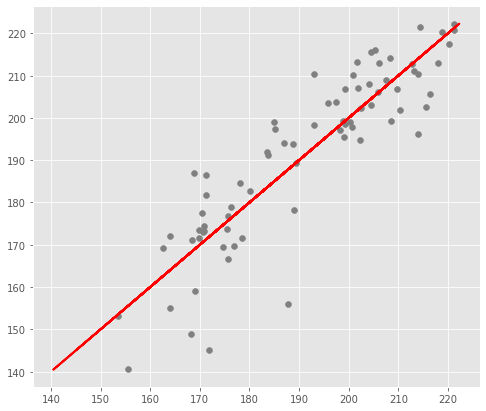

In [36]:
get_plot(y_pred_knn)

<h1>Evaluation</h1>

In [37]:
df_comp=pd.DataFrame({"lr":np.absolute(y_test-y_pred_reg), 
                      "poly2":np.absolute(y_test-y_pred_poly2),
                      "poly3":np.absolute(y_test-y_pred_poly2), 
                      "ridge":np.absolute(y_test-y_pred_ridge),
                      "lasso":np.absolute(y_test-y_pred_lasso),
                      "gb":np.absolute(y_test-y_pred_gb),
                     "knn":np.absolute(y_test-y_pred_knn)})

(9, 20)

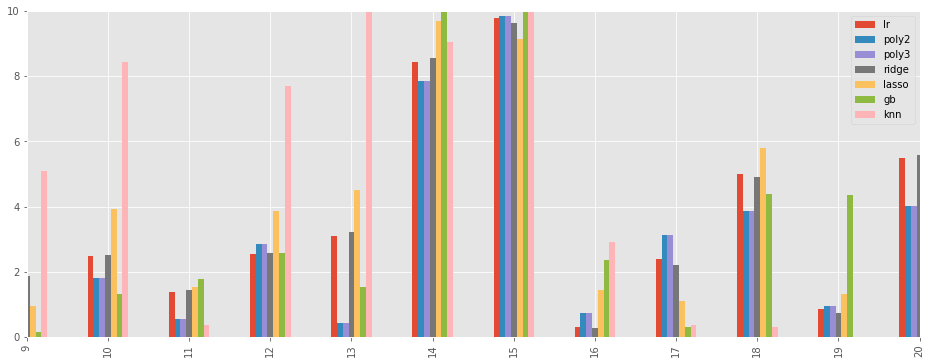

In [38]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)

<h1>Conclusion</h1>

We went through 7 different algorithms, ranging from simple to complex:

From that, We can conclude that linear regression is giving the best performance with the least complexity.